In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('steam.csv')
df.sample(5)

appid                                  name release_date  english   
1325   208650                Batman™: Arkham Knight   2015-06-23        1  \
23959  913660                       Supaplex THINK!   2018-09-18        1   
19627  779560                               公主的逃脱日常   2018-03-07        0   
18574  750010                         Combat Tested   2018-03-23        1   
935     57620  Patrician IV - Steam Special Edition   2010-09-17        1   

                      developer                               publisher   
1325         Rocksteady Studios  Warner Bros. Interactive Entertainment  \
23959                  InArcade                                InArcade   
19627                   Pioneer                                 Pioneer   
18574  Buckethead Entertainment                Buckethead Entertainment   
935        Gaming Minds Studios                   Kalypso Media Digital   

         platforms  required_age   
1325       windows            18  \
23959  windows;mac             0   
19627      windows             0   
18574      windows             0   
935        windows             0   

                                              categories   
1325   Single-player;Steam Achievements;Full controll...  \
23959  Single-player;Steam Achievements;Full controll...   
19627                                      Single-player   
18574                                      Single-player   
935                                        Single-player   

                                  genres   
1325                    Action;Adventure  \
23959                Action;Casual;Indie   
19627  Action;Adventure;Casual;Indie;RPG   
18574                Violent;Gore;Action   
935                             Strategy   

                              steamspy_tags  achievements  positive_ratings   
1325               Batman;Action;Open World           113             33121  \
23959                   Action;Indie;Casual             5                 2   
19627                  Action;Adventure;RPG             0                 7   
18574                   Action;Gore;Violent             0                35   
935    Strategy;Trading;Resource Management             0               153   

       negative_ratings  average_playtime  median_playtime           owners   
1325              12981              1266             1296  1000000-2000000  \
23959                 0                 0                0          0-20000   
19627                 3                 0                0          0-20000   
18574                13                 0                0          0-20000   
935                 129                 0                0    100000-200000   

       price  
1325   15.99  
23959   7.19  
19627   0.00  
18574  15.49  
935     9.99

In [3]:
df.shape

(27075, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27074 non-null  object 
 5   publisher         27061 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

In [5]:
df.describe()

appid       english  required_age  achievements   
count  2.707500e+04  27075.000000  27075.000000  27075.000000  \
mean   5.962035e+05      0.981127      0.354903     45.248864   
std    2.508942e+05      0.136081      2.406044    352.670281   
min    1.000000e+01      0.000000      0.000000      0.000000   
25%    4.012300e+05      1.000000      0.000000      0.000000   
50%    5.990700e+05      1.000000      0.000000      7.000000   
75%    7.987600e+05      1.000000      0.000000     23.000000   
max    1.069460e+06      1.000000     18.000000   9821.000000   

       positive_ratings  negative_ratings  average_playtime  median_playtime   
count      2.707500e+04      27075.000000      27075.000000      27075.00000  \
mean       1.000559e+03        211.027147        149.804949        146.05603   
std        1.898872e+04       4284.938531       1827.038141       2353.88008   
min        0.000000e+00          0.000000          0.000000          0.00000   
25%        6.000000e+00          2.000000          0.000000          0.00000   
50%        2.400000e+01          9.000000          0.000000          0.00000   
75%        1.260000e+02         42.000000          0.000000          0.00000   
max        2.644404e+06     487076.000000     190625.000000     190625.00000   

              price  
count  27075.000000  
mean       6.078193  
std        7.874922  
min        0.000000  
25%        1.690000  
50%        3.990000  
75%        7.190000  
max      421.990000

In [6]:
df.nunique()

appid               27075
name                27033
release_date         2619
english                 2
developer           17112
publisher           14353
platforms               7
required_age            6
categories           3333
genres               1552
steamspy_tags        6423
achievements          410
positive_ratings     2800
negative_ratings     1492
average_playtime     1345
median_playtime      1312
owners                 13
price                 282
dtype: int64

<b>English column</b>

In [7]:
df['english'].unique()

array([1, 0], dtype=int64)

In [8]:
#Assuming 1 - English and 0 - Non-Engish
#Lets Replace the values in the 'english' column
df['english'] = df['english'].replace({1:'English', 0:'Non-English'})
value_counts = df['english'].value_counts()
value_counts

english
English        26564
Non-English      511
Name: count, dtype: int64

In [9]:
value_countsPercentage = (df['english'].value_counts(normalize = True) * 100).round(2)
value_countsPercentage

english
English        98.11
Non-English     1.89
Name: proportion, dtype: float64

98% of the games support English

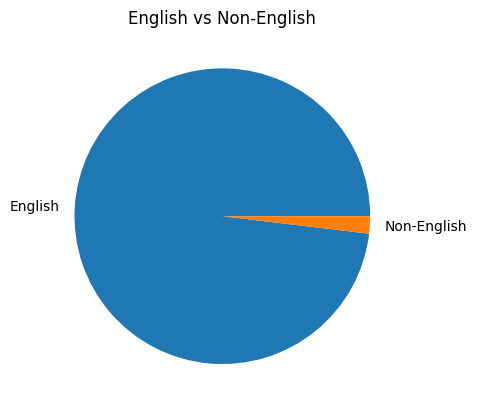

In [10]:
# Plot a pie chart
plt.pie(value_counts.values, labels=value_counts.index)

# Add a title to the chart
plt.title('English vs Non-English')

plt.show()

<b>Developer</b>

In [11]:
df['developer'].sample(5)

5226     Frontier Developments
9915                  AG media
7573            Positech Games
14917             Pixel Wonder
23465               Shahzeb A.
Name: developer, dtype: object

In [12]:
top10_developers = df['developer'].value_counts().sort_values(ascending = False).head(10)
top10_developers

developer
Choice of Games               94
KOEI TECMO GAMES CO., LTD.    72
Ripknot Systems               62
Laush Dmitriy Sergeevich      51
Nikita "Ghost_RUS"            50
Dexion Games                  45
RewindApp                     43
Hosted Games                  42
Blender Games                 40
Humongous Entertainment       36
Name: count, dtype: int64

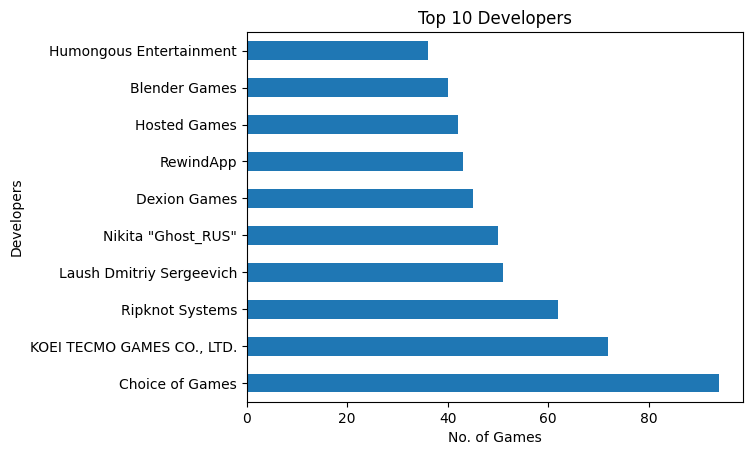

In [13]:
top10_developers.plot(kind='barh')

# Add a title to the chart
plt.title('Top 10 Developers')
plt.xlabel('No. of Games')
plt.ylabel('Developers')

# Show the chart
plt.show()

<b>Publisher</b>

In [14]:
df['publisher'].sample(5)

2755           BANDAI NAMCO Entertainment
10731    Strength in Numbers Studios, Inc
25129                  Naviworks Co.,Ltd.
21445                    Paradise Project
15451             Jonathan Holmes (crait)
Name: publisher, dtype: object

In [15]:
top10publishers = df['publisher'].value_counts().sort_values(ascending = False).head(10)
top10publishers

publisher
Big Fish Games         212
Strategy First         136
Ubisoft                111
THQ Nordic              98
Square Enix             97
Sekai Project           96
Choice of Games         94
Dagestan Technology     88
1C Entertainment        88
SEGA                    78
Name: count, dtype: int64

In [16]:
top10publishers.plot(kind='barh')

# Add a title to the chart
plt.title('Top 10 Publishers')
plt.xlabel('No. of Games')
plt.ylabel('Pusblishers')

# Show the chart
plt.show()

<b>Platform</b>

In [17]:
df['platforms'].unique()

array(['windows;mac;linux', 'windows;mac', 'windows', 'windows;linux',
       'mac', 'mac;linux', 'linux'], dtype=object)

In [18]:
(df['platforms'].value_counts(normalize = True) * 100).round(2)

platforms
windows              67.95
windows;mac;linux    17.07
windows;mac          12.70
windows;linux         2.25
mac                   0.01
mac;linux             0.00
linux                 0.00
Name: proportion, dtype: float64

67% of the games support windows platform

<Axes: xlabel='platforms'>

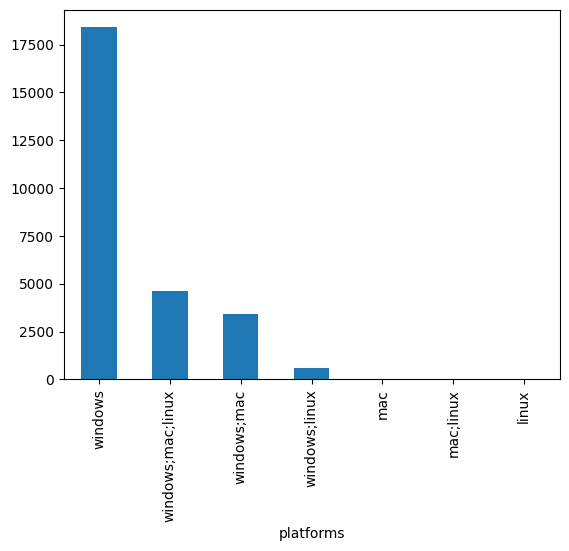

In [19]:
df['platforms'].value_counts().plot(kind = 'bar')

Individual Occurence of each platform

In [20]:
platforms = df['platforms'].apply(lambda x: x.split(';')).explode().value_counts()
platforms

platforms
windows    27070
mac         8066
linux       5235
Name: count, dtype: int64

In [21]:
platform_percentage = platforms = df['platforms'].apply(lambda x: x.split(';')).explode().value_counts(normalize = True)*100
platform_percentage

platforms
windows    67.053083
mac        19.979688
linux      12.967229
Name: proportion, dtype: float64

In [22]:
platforms.plot(kind = 'pie')

<Axes: ylabel='proportion'>

<b>Required AGe</b>
<br>
This column represents minimum required age for each Game

In [23]:
df['required_age'].unique()

array([ 0, 18, 16, 12,  7,  3], dtype=int64)

In [24]:
df['required_age'].value_counts()

required_age
0     26479
18      308
16      192
12       73
7        12
3        11
Name: count, dtype: int64

In [25]:
percentageAge = (df['required_age'].value_counts(normalize = True) * 100).round(2)
percentageAge

required_age
0     97.80
18     1.14
16     0.71
12     0.27
7      0.04
3      0.04
Name: proportion, dtype: float64

97% of the games have no minimum age requirement

In [26]:
df['categories'].sample(5)

15961    Single-player;Steam Achievements;Full controll...
21345    Single-player;Captions available;Partial Contr...
20163                     Single-player;Steam Achievements
16126                                        Single-player
18991                                        Single-player
Name: categories, dtype: object

In [27]:
df['categories'].nunique()

3333

In [28]:
categories = df['categories'].apply(lambda x: x.split(';')).explode().value_counts()
categories

categories
Single-player                 25678
Steam Achievements            14130
Steam Trading Cards            7918
Steam Cloud                    7219
Full controller support        5695
Partial Controller Support     4234
Multi-player                   3974
Steam Leaderboards             3439
Online Multi-Player            2487
Shared/Split Screen            2152
Stats                          1878
Co-op                          1721
Local Multi-Player             1615
Cross-Platform Multiplayer     1081
Online Co-op                   1071
Local Co-op                    1059
Includes level editor          1036
Steam Workshop                  897
Captions available              721
In-App Purchases                690
MMO                             421
VR Support                      231
Commentary available            144
Valve Anti-Cheat enabled         94
Steam Turn Notifications         63
SteamVR Collectibles             40
Includes Source SDK              35
Mods             

In [29]:
percentage_categories = (df['categories'].apply(lambda x: x.split(';')).explode().value_counts(normalize = True) * 100).round(2)
percentage_categories

categories
Single-player                 28.62
Steam Achievements            15.75
Steam Trading Cards            8.82
Steam Cloud                    8.05
Full controller support        6.35
Partial Controller Support     4.72
Multi-player                   4.43
Steam Leaderboards             3.83
Online Multi-Player            2.77
Shared/Split Screen            2.40
Stats                          2.09
Co-op                          1.92
Local Multi-Player             1.80
Cross-Platform Multiplayer     1.20
Online Co-op                   1.19
Local Co-op                    1.18
Includes level editor          1.15
Steam Workshop                 1.00
Captions available             0.80
In-App Purchases               0.77
MMO                            0.47
VR Support                     0.26
Commentary available           0.16
Valve Anti-Cheat enabled       0.10
Steam Turn Notifications       0.07
SteamVR Collectibles           0.04
Includes Source SDK            0.04
Mods             

<Axes: xlabel='categories'>

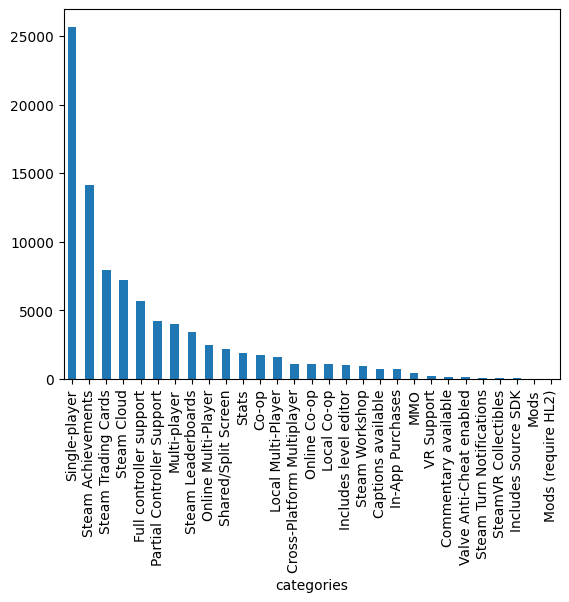

In [30]:
categories.plot(kind = 'bar')

Most games support single player mode with over 28%

<b>Multi - Player Availability</b>

In [31]:
# Replace "Multi-player" with "Multiplayer" in the categories column
df['categories'] = df['categories'].str.replace('Multi-player', 'Multiplayer')

In [32]:
#Apply Method
multiplayer_mode1 = df['categories'].apply(lambda x: "Multiplayer" not in x).value_counts()
multiplayer_mode1

categories
True     22881
False     4194
Name: count, dtype: int64

In [33]:
# Using pandas method
multiplayer_mode2 = (df['categories'].str.contains('Multiplayer').value_counts(normalize = True)*100).round(2)
multiplayer_mode2

categories
False    84.51
True     15.49
Name: proportion, dtype: float64

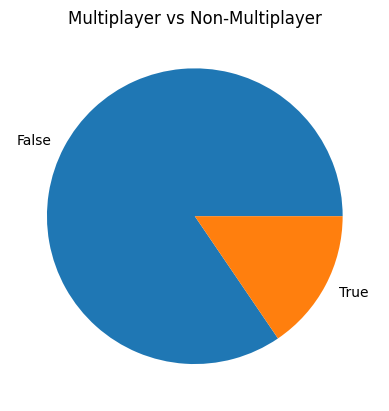

In [34]:
# Plot a pie chart
plt.pie(multiplayer_mode2.values, labels=multiplayer_mode2.index)

# Add a title to the chart
plt.title('Multiplayer vs Non-Multiplayer')

plt.show()

84% of the games do not support multiplayer game mode

<b>Genre</b>

In [35]:
df['genres'].sample(5)

6474     Adventure;Indie;Strategy;Early Access
22796                      Action;Casual;Indie
1319                       Simulation;Strategy
1277                                    Action
2284                    Action;Adventure;Indie
Name: genres, dtype: object

In [36]:
df['genres'].nunique()

1552

In [37]:
df['genres'].value_counts().head(10)

genres
Action;Indie              1852
Casual;Indie              1482
Action;Adventure;Indie    1229
Adventure;Indie           1170
Action;Casual;Indie       1004
Action                     843
Adventure;Casual;Indie     801
Indie                      759
Casual                     560
Adventure                  535
Name: count, dtype: int64

In [38]:
genres = df['genres'].apply(lambda x: x.split(';')).explode().value_counts()
genres

genres
Indie                    19421
Action                   11903
Casual                   10210
Adventure                10032
Strategy                  5247
Simulation                5194
RPG                       4311
Early Access              2954
Free to Play              1704
Sports                    1322
Racing                    1024
Violent                    843
Massively Multiplayer      723
Gore                       537
Nudity                     266
Sexual Content             245
Utilities                  146
Design & Illustration       87
Animation & Modeling        79
Education                   51
Video Production            38
Software Training           31
Audio Production            29
Web Publishing              28
Game Development            17
Photo Editing               12
Accounting                   6
Documentary                  1
Tutorial                     1
Name: count, dtype: int64

<Axes: ylabel='genres'>

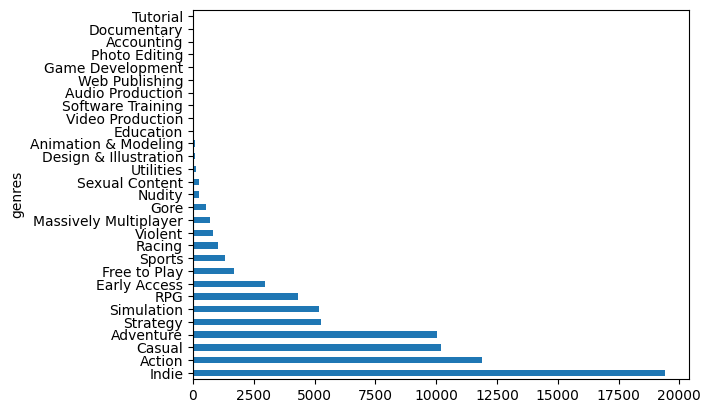

In [39]:
genres.plot(kind = 'barh')

In [40]:
df['steamspy_tags'].sample(5)

19417         Early Access;Strategy;FPS
19274     Free to Play;Action;Adventure
21236    Adventure;Casual;Hidden Object
6005            Indie;Platformer;Puzzle
5918             Adventure;Indie;Action
Name: steamspy_tags, dtype: object

In [41]:
df['steamspy_tags'].nunique(5)

6423

In [42]:
df['steamspy_tags'].value_counts().head(10)

steamspy_tags
Action;Indie;Casual               845
Action;Adventure;Indie            714
Early Access;Action;Indie         507
Adventure;Indie;Casual            442
Indie;Casual                      378
Action;Indie;Adventure            328
Action;Indie                      290
Adventure;Casual;Hidden Object    244
Indie;Casual;Puzzle               236
Indie;Casual;Simulation           229
Name: count, dtype: int64

In [43]:
steamspy_tags = df['steamspy_tags'].apply(lambda x: x.split(';')).explode().value_counts().head(20)
steamspy_tags

steamspy_tags
Indie             16232
Action            10322
Casual             8205
Adventure          7770
Strategy           4173
Simulation         3284
Early Access       2967
RPG                2785
Free to Play       1662
Puzzle             1116
VR                  961
Sports              781
Racing              765
Platformer          648
Nudity              570
Sexual Content      557
Visual Novel        546
Violent             545
Anime               538
Horror              493
Name: count, dtype: int64

<Axes: ylabel='steamspy_tags'>

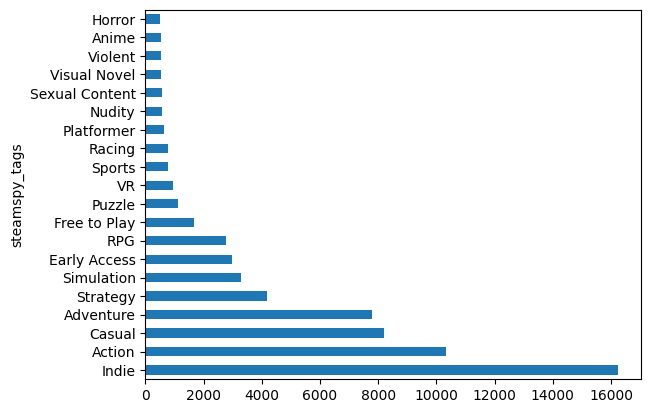

In [44]:
steamspy_tags.plot(kind = 'barh')

<b>Ratings</b>

In [45]:
df['positive_ratings'].sample(5)

9162     17
13555     4
21310     4
26307     1
17135    24
Name: positive_ratings, dtype: int64

In [46]:
#Top 10 Games with the most positive ratings
top_ratings = df.sort_values(by='positive_ratings', ascending=False).head(10)[['name', 'positive_ratings']]
top_ratings

name  positive_ratings
25     Counter-Strike: Global Offensive           2644404
22                               Dota 2            863507
19                      Team Fortress 2            515879
12836     PLAYERUNKNOWN'S BATTLEGROUNDS            496184
121                         Garry's Mod            363721
2478                 Grand Theft Auto V            329061
1467                           PAYDAY 2            308657
3362                           Unturned            292574
1120                           Terraria            255600
21                        Left 4 Dead 2            251789

In [47]:
#Top 10 games with the most negative ratings
worst_ratings = df.sort_values(by='negative_ratings', ascending = False).head(10)[['name','negative_ratings']]
worst_ratings

name  negative_ratings
12836     PLAYERUNKNOWN'S BATTLEGROUNDS            487076
25     Counter-Strike: Global Offensive            402313
22                               Dota 2            142079
2478                 Grand Theft Auto V            139308
7809                   Z1 Battle Royale             91664
1506                               DayZ             77169
4712              ARK: Survival Evolved             66603
5235    Tom Clancy's Rainbow Six® Siege             59620
1467                           PAYDAY 2             56523
2563                       No Man's Sky             56488

<b>Dealing with the Owner's column</b>

In [48]:
df['owners'].sample(5)

2642     200000-500000
10662          0-20000
10598          0-20000
9996           0-20000
6705       20000-50000
Name: owners, dtype: object

In [49]:
df['owners'].unique()

array(['10000000-20000000', '5000000-10000000', '2000000-5000000',
       '20000000-50000000', '100000000-200000000', '50000000-100000000',
       '20000-50000', '500000-1000000', '100000-200000', '50000-100000',
       '1000000-2000000', '200000-500000', '0-20000'], dtype=object)

In [50]:
#Extracting Median Value from the Ranges in the column
df['owners'] = df['owners'].str.replace(',', '').str.replace('+', '').str.split('-').apply(lambda x: (int(x[0])+int(x[1]))/2)
df['owners']

0        15000000.0
1         7500000.0
2         7500000.0
3         7500000.0
4         7500000.0
            ...    
27070       10000.0
27071       10000.0
27072       10000.0
27073       10000.0
27074       10000.0
Name: owners, Length: 27075, dtype: float64

In [51]:
#Most popular games
popular_games = df.sort_values(by = 'owners', ascending = False).head(20)[['name','owners']]
popular_games

name       owners
22                               Dota 2  150000000.0
25     Counter-Strike: Global Offensive   75000000.0
12836     PLAYERUNKNOWN'S BATTLEGROUNDS   75000000.0
19                      Team Fortress 2   35000000.0
3362                           Unturned   35000000.0
1634                           Warframe   35000000.0
1727                        War Thunder   15000000.0
23                             Portal 2   15000000.0
1025        The Elder Scrolls V: Skyrim   15000000.0
1467                           PAYDAY 2   15000000.0
1607                  Heroes & Generals   15000000.0
0                        Counter-Strike   15000000.0
21                        Left 4 Dead 2   15000000.0
7809                   Z1 Battle Royale   15000000.0
2478                 Grand Theft Auto V   15000000.0
2951                            Warface   15000000.0
2952                         Brawlhalla   15000000.0
8129                          Paladins®   15000000.0
3251                          Robocraft   15000000.0
121                         Garry's Mod   15000000.0

Distribution of number of owners

In [52]:
owner_counts = df['owners'].value_counts()
owner_counts

owners
10000.0        18596
35000.0         3059
75000.0         1695
150000.0        1386
350000.0        1272
750000.0         513
1500000.0        288
3500000.0        193
7500000.0         46
15000000.0        21
35000000.0         3
75000000.0         2
150000000.0        1
Name: count, dtype: int64

In [70]:
pct_owner_counts = (df['owners'].value_counts(normalize = True)* 100).round(2)
pct_owner_counts

owners
10000.0        68.68
35000.0        11.30
75000.0         6.26
150000.0        5.12
350000.0        4.70
750000.0        1.89
1500000.0       1.06
3500000.0       0.71
7500000.0       0.17
15000000.0      0.08
35000000.0      0.01
75000000.0      0.01
150000000.0     0.00
Name: proportion, dtype: float64

<Axes: xlabel='owners'>

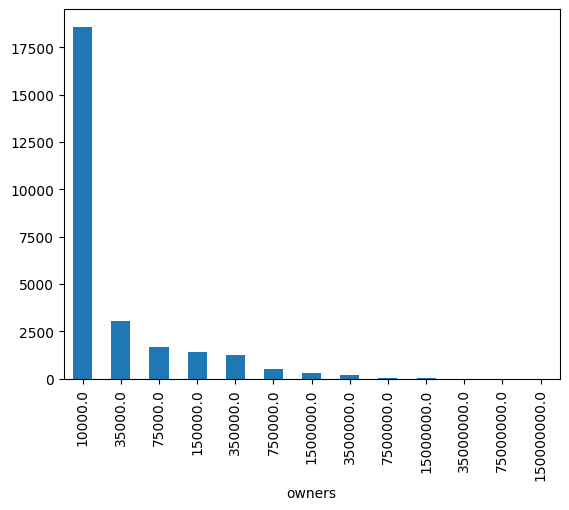

In [53]:
owner_counts.plot(kind = 'bar')

In [54]:
mask = df.owners.isin(['10000000-20000000', '20000000-50000000', '50000000-100000000', '100000000-200000000'])
df.loc[mask, 'owners'] = '10mil and more'

In [55]:
df.loc[df.owners == '5000000-10000000', 'owners'] = '5mil-10mil'
df.loc[df.owners == '2000000-5000000', 'owners'] = '2mil-5mil'
df.loc[df.owners == '1000000-2000000', 'owners'] = '1mil-2mil'
df.loc[df.owners == '500000-1000000', 'owners'] = '500k-1mil'
df.loc[df.owners == '200000-500000', 'owners'] = '200k-500k'
df.loc[df.owners == '100000-200000', 'owners'] = '100k-200k'
df.loc[df.owners == '50000-100000', 'owners'] = '50k-100k'
df.loc[df.owners == '20000-50000', 'owners'] = '20k-50k'
df.loc[df.owners == '0-20000', 'owners'] = '20k or less'

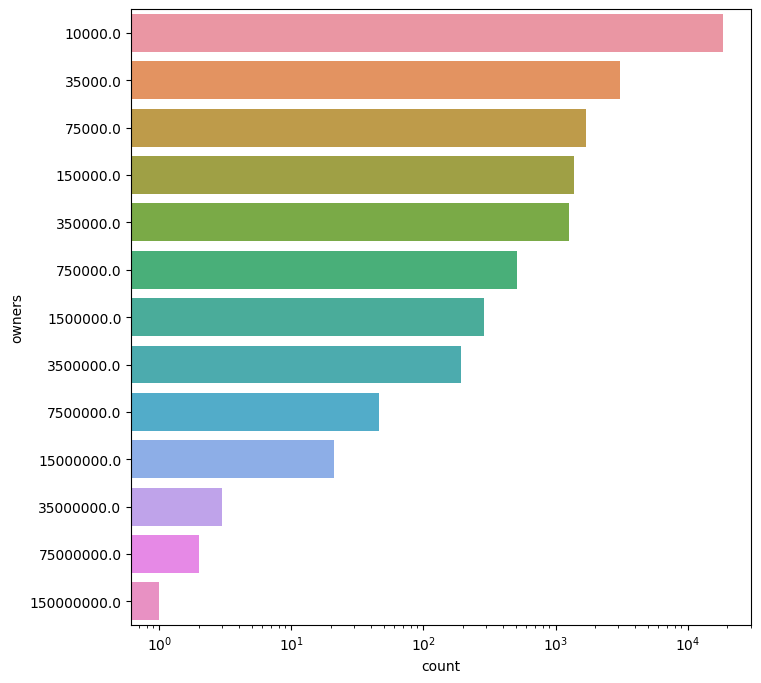

In [56]:
plt.figure(figsize=(8,8))

g = sns.countplot(data=df, y='owners', order=df.owners.value_counts().index)
g.set_xscale('log')

<b>Dealing with the Price column</b>

In [57]:
df['price'].sample(5)

8738     14.99
10891     1.99
20334    10.29
26854     4.79
13953     1.59
Name: price, dtype: float64

Games with the Highest and Lowest Prices


In [58]:
game_prices = df.sort_values(by='price', ascending = False).head(20)[['name','price']]
game_prices

name   price
21105                                 ADR-Labelling Game  421.99
13062                             GameMaker Studio 2 UWP  303.99
10034                                      Houdini Indie  209.99
14917                                     CrisisActionVR  154.99
25568                                         Bible Test  154.99
10624                        Tactics: Bludgeons Blessing  154.99
13063                          GameMaker Studio 2 Mobile  154.99
10910                                         Silhouette  154.99
7992                       3DF Zephyr Lite Steam Edition  154.99
17126                                     Tactics 2: War  154.99
13061                             GameMaker Studio 2 Web  114.99
7696                                      The Music Room   98.99
1102                                          3DCoat 4.8   95.99
18745  CyberLink PowerDVD 18 Ultra - Media player, vi...   79.99
1988                               Leadwerks Game Engine   78.99
18503                                       RealFlight 8   78.99
12212                                        Emission VR   75.99
2049                               Aartform Curvy 3D 3.0   75.99
13053                         GameMaker Studio 2 Desktop   75.99
12517                                     articy:draft 3   74.99

In [59]:
highest_price_game = df.loc[df['price'].idxmax(), 'name']
lowest_price_game = df.loc[df['price'].idxmin(), 'name']

print('Game with the highest price:', highest_price_game)
print('Game with the lowest price:', lowest_price_game)

Game with the highest price: ADR-Labelling Game
Game with the lowest price: Half-Life: Source


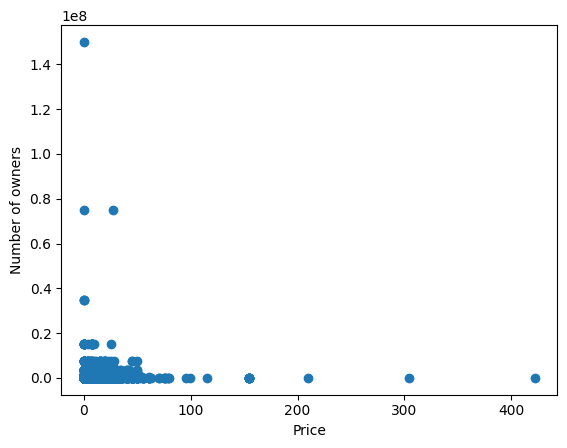

In [60]:
#Relationship between Price and Number of owners
plt.scatter(df['price'], df['owners'])
plt.xlabel('Price')
plt.ylabel('Number of owners')
plt.show()

Average price and the average number of owners for games in different genres and platforms

In [61]:
# Group by platform and calculate the mean price and number of owners
df.groupby('platforms')[['price', 'owners']].mean().sort_values(by='price', ascending = False)

price         owners
platforms                                 
windows;mac;linux  6.479760  294594.419208
mac                6.126667   31666.666667
windows;mac        6.105347  117337.888921
windows            6.009143   97933.471029
windows;linux      4.978328  103557.377049
mac;linux          3.490000        10000.0
linux              0.000000        10000.0

In [62]:
# Group by genre and calculate the mean price and number of owners
df.groupby('genres')[['price', 'owners']].mean().sort_values(by = 'price', ascending = False).head(10)

price        owners
genres                                                                      
Animation & Modeling;Design & Illustration;Educ...  178.323333  18333.333333
Animation & Modeling;Design & Illustration;Vide...  154.990000       10000.0
Animation & Modeling;Design & Illustration;Educ...  114.990000       10000.0
Animation & Modeling;Design & Illustration;Game...  110.490000       10000.0
Violent;Gore;Action;Adventure;Indie;Massively M...   79.890000       10000.0
Animation & Modeling;Education;Utilities;Web Pu...   69.990000      150000.0
Animation & Modeling;Design & Illustration;Educ...   60.990000       75000.0
Animation & Modeling                                 57.326667       10000.0
Design & Illustration;Web Publishing                 55.656667      370000.0
Sexual Content;Nudity;Violent;Gore;Action            49.990000       35000.0

# Outliers

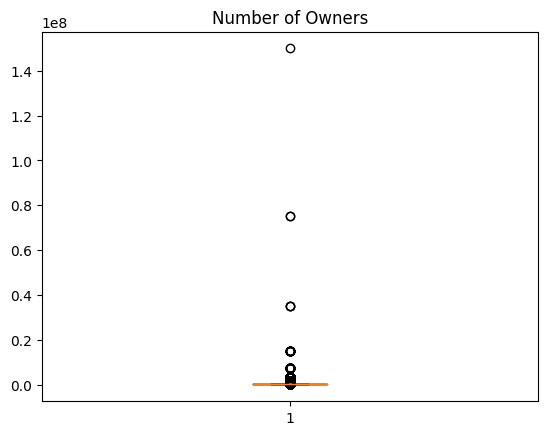

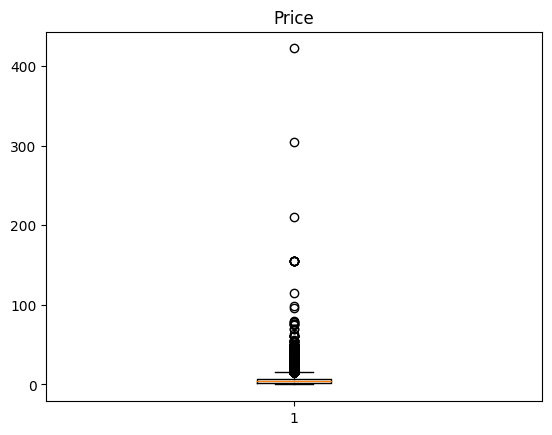

In [63]:
# Box plot of the owners column
plt.boxplot(df['owners'])
plt.title('Number of Owners')
plt.show()

# Box plot of the price column
plt.boxplot(df['price'])
plt.title('Price')
plt.show()

# Release Date

Release Year

In [64]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [65]:
df.head()

appid                       name release_date  english         developer   
0     10             Counter-Strike   2000-11-01  English             Valve  \
1     20      Team Fortress Classic   1999-04-01  English             Valve   
2     30              Day of Defeat   2003-05-01  English             Valve   
3     40         Deathmatch Classic   2001-06-01  English             Valve   
4     50  Half-Life: Opposing Force   1999-11-01  English  Gearbox Software   

  publisher          platforms  required_age   
0     Valve  windows;mac;linux             0  \
1     Valve  windows;mac;linux             0   
2     Valve  windows;mac;linux             0   
3     Valve  windows;mac;linux             0   
4     Valve  windows;mac;linux             0   

                                          categories  genres   
0  Multiplayer;Online Multi-Player;Local Multi-Pl...  Action  \
1  Multiplayer;Online Multi-Player;Local Multi-Pl...  Action   
2               Multiplayer;Valve Anti-Cheat enabled  Action   
3  Multiplayer;Online Multi-Player;Local Multi-Pl...  Action   
4  Single-player;Multiplayer;Valve Anti-Cheat ena...  Action   

                  steamspy_tags  achievements  positive_ratings   
0        Action;FPS;Multiplayer             0            124534  \
1        Action;FPS;Multiplayer             0              3318   
2  FPS;World War II;Multiplayer             0              3416   
3        Action;FPS;Multiplayer             0              1273   
4             FPS;Action;Sci-fi             0              5250   

   negative_ratings  average_playtime  median_playtime      owners  price  
0              3339             17612              317  15000000.0   7.19  
1               633               277               62   7500000.0   3.99  
2               398               187               34   7500000.0   3.99  
3               267               258              184   7500000.0   3.99  
4               288               624              415   7500000.0   3.99

In [66]:
yearly = df.groupby(df.release_date.dt.year.rename('release_year'))\
    .agg('count').appid.rename('count')

sep_year = 2006

plt.figure(figsize=(8,6))

yearly_part = yearly[yearly.index < sep_year]
sns.barplot(y=yearly_part, x=yearly_part.index)
plt.title(f'Total games released in 1997-{sep_year-1} years')
plt.xlabel('Year')
plt.ylabel('Total games')

Text(0, 0.5, 'Total games')

Text(0, 0.5, 'Total games')

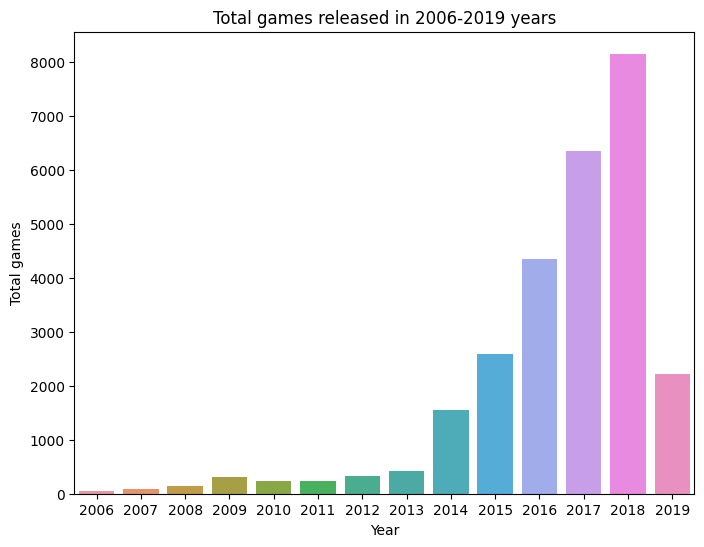

In [67]:
plt.figure(figsize=(8,6))

yearly_part = yearly[yearly.index >= sep_year]
sns.barplot(y=yearly_part, x=yearly_part.index)
plt.title(f'Total games released in {sep_year}-2019 years')
plt.xlabel('Year')
plt.ylabel('Total games')

# Key Take-aways

98% of the games support English
<br>
Choice of games are the top game developers creating up to 94 games
<br>
67.95% games support only windows and 17% of the games support all platforms windows, mac and linux
<br>
19.98% of the games support mac platforms and 12.97% support only Linux platforms
<br>
97.8% of the games have no minimum age requirement
<br>
28.62% of the games are in single player mode and over 80% of the games do not support multi player mode